In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

In [41]:
folder_names = {'uU': 'fixed_stored_UU', 
                'uL': 'fixed-saved-UL', 
                'uu': 'saved-original', 
                'sL': 'saved-UL', 
                'sU': 'stored_UU'}

In [42]:
data_dir = "bootvals"

In [43]:
total_dataset = {key: [] for key in folder_names.keys()}

for key, val in folder_names.items():
    search = data_dir + f"/{val}*.csv"
    files = glob.glob("../" + data_dir + f"//{val}*.csv")
    for epoch in range(1, 1+len(files)):
        for file in files:
            if f"epoch{epoch}" in file:
                total_dataset[key].append(pd.read_csv(file))
    

In [44]:
labels = total_dataset['uL'][0].columns[1:]
print(labels)

Index(['Enlarged Cardiomediastinum_auc', 'Cardiomegaly_auc',
       'Lung Opacity_auc', 'Lung Lesion_auc', 'Edema_auc', 'Consolidation_auc',
       'Pneumonia_auc', 'Atelectasis_auc', 'Pneumothorax_auc',
       'Pleural Effusion_auc', 'Pleural Other_auc', 'Fracture_auc',
       'Support Devices_auc'],
      dtype='object')


In [71]:
def plot_performance(label):
    plot_colors = {key: el for key, el in zip(total_dataset.keys(),['lawngreen', 'cyan', 'black', 'magenta', 'salmon'])}
    error_colors = {key: el for key, el in zip(total_dataset.keys(), ['yellow', 'blue', 'lightgrey', 'purple', 'red'])}

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)  # nrows, ncols, index
    super_avg = 0
    for key, val in total_dataset.items():
        average = [0]
        upper_ci = [0]
        lower_ci = [0]
        for v in val:
            average.append(v[label][0])
            lower_ci.append(v[label][1])
            upper_ci.append(v[label][2])
        super_avg += np.mean(average)
        plt.plot(list(range(0, len(average))), average, label=key, color=plot_colors[key], marker="+")
        plt.fill_between(
            list(range(0, len(average))),
            upper_ci,
            lower_ci,
            alpha=0.1,
            facecolor=error_colors[key],
            linestyle="-"
        )
    ax.set_facecolor('whitesmoke')
    super_avg = super_avg / 5
        # Hide the right and top spines
    plt.grid()
    plt.title(f'{label[:-4]} AUC over Tuning Methods')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    if super_avg > 0.65:
        plt.ylim(0.5, 1)
    plt.legend()
    plt.show()
    plt.savefig(f"{label}_llt.png")
        

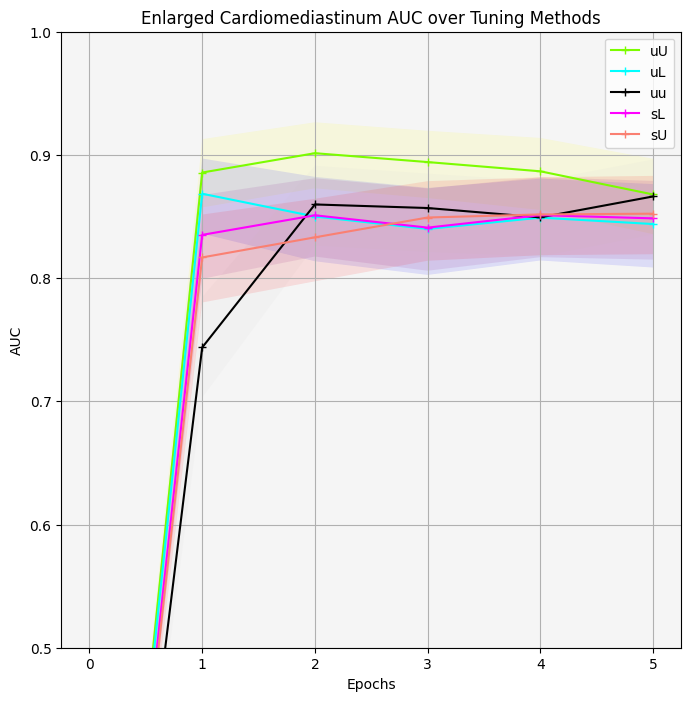

<Figure size 640x480 with 0 Axes>

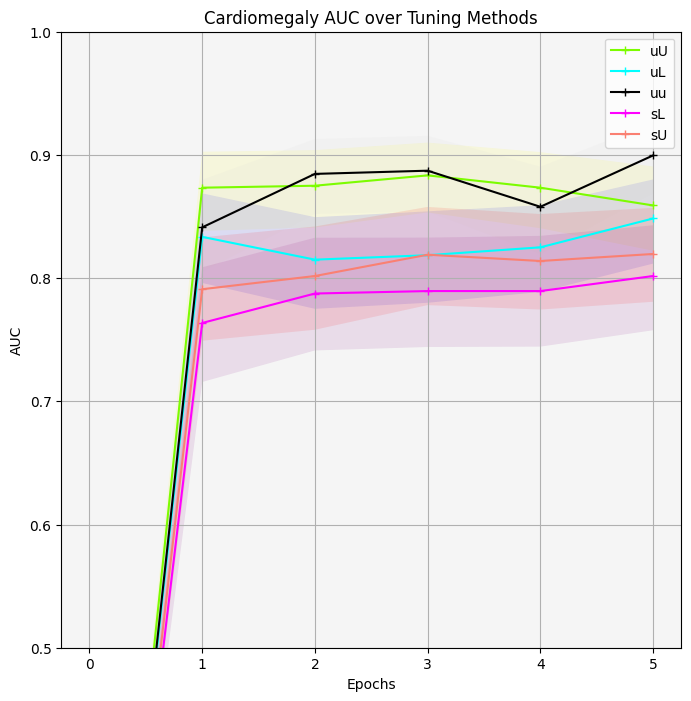

<Figure size 640x480 with 0 Axes>

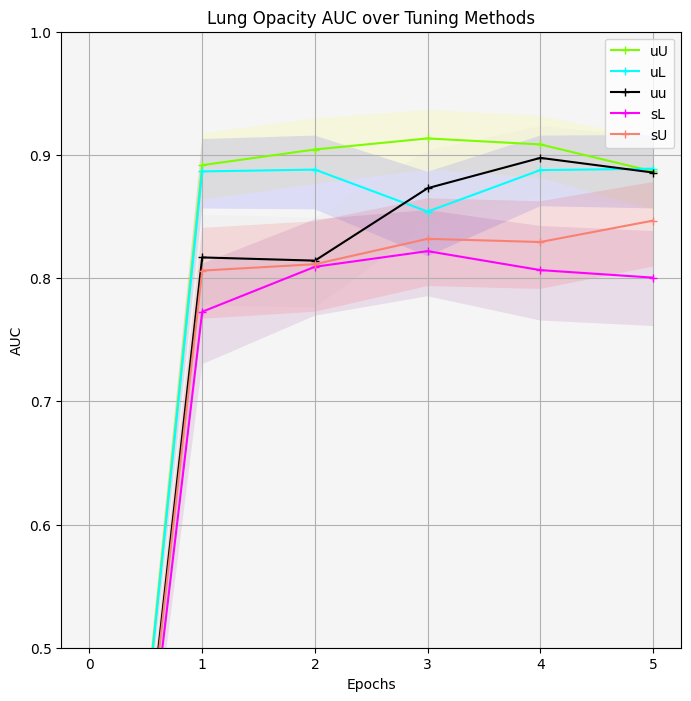

<Figure size 640x480 with 0 Axes>

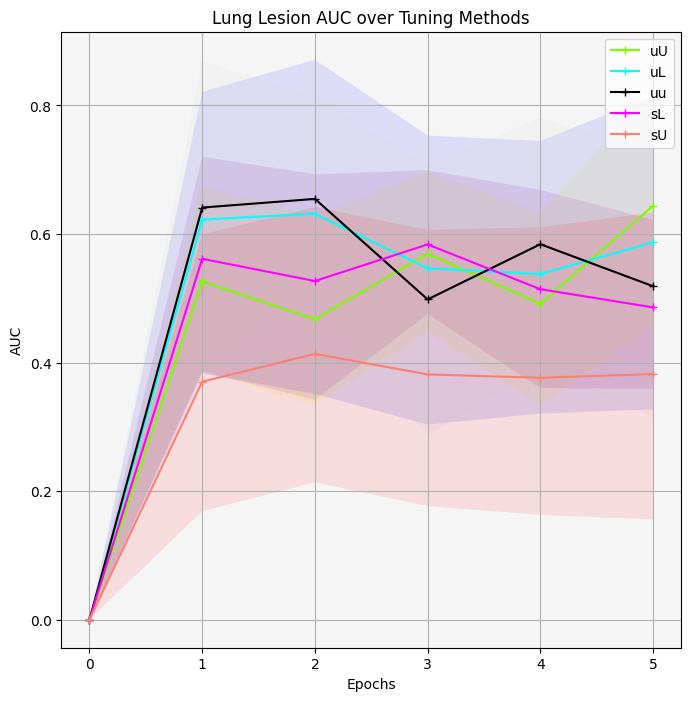

<Figure size 640x480 with 0 Axes>

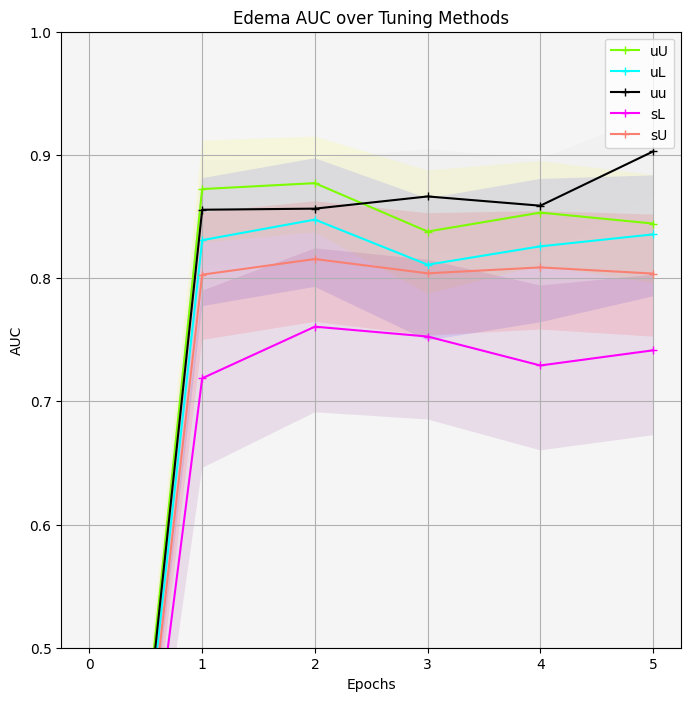

<Figure size 640x480 with 0 Axes>

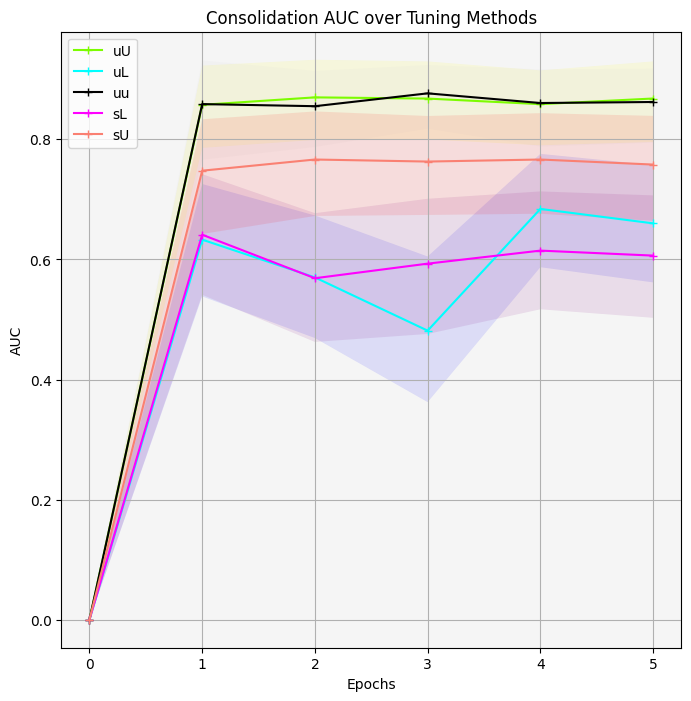

<Figure size 640x480 with 0 Axes>

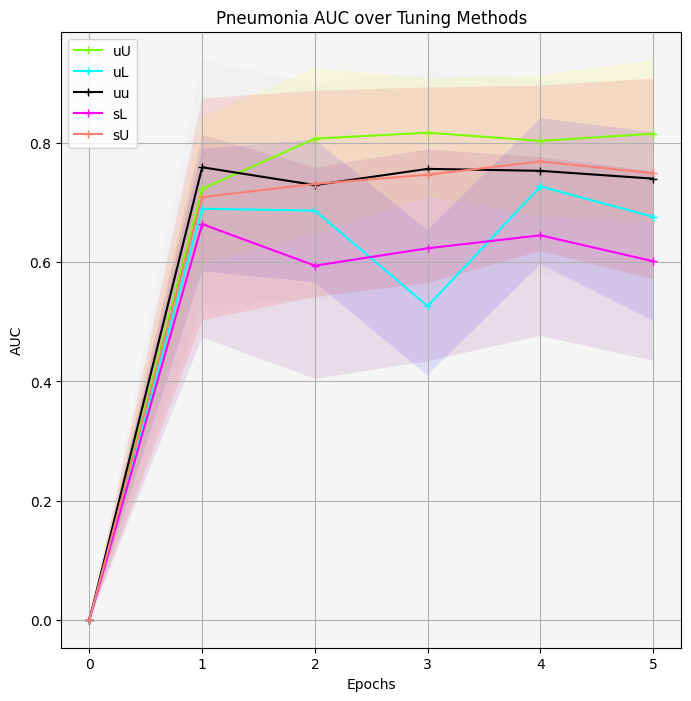

<Figure size 640x480 with 0 Axes>

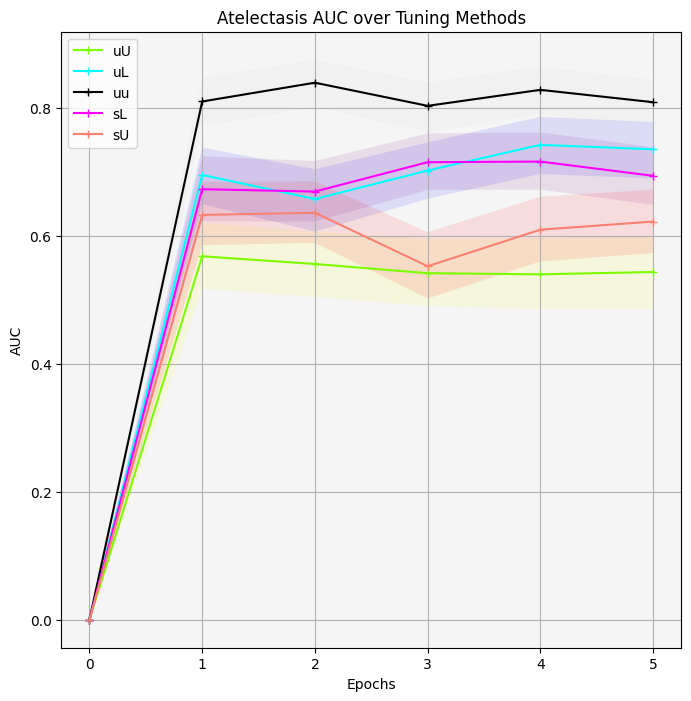

<Figure size 640x480 with 0 Axes>

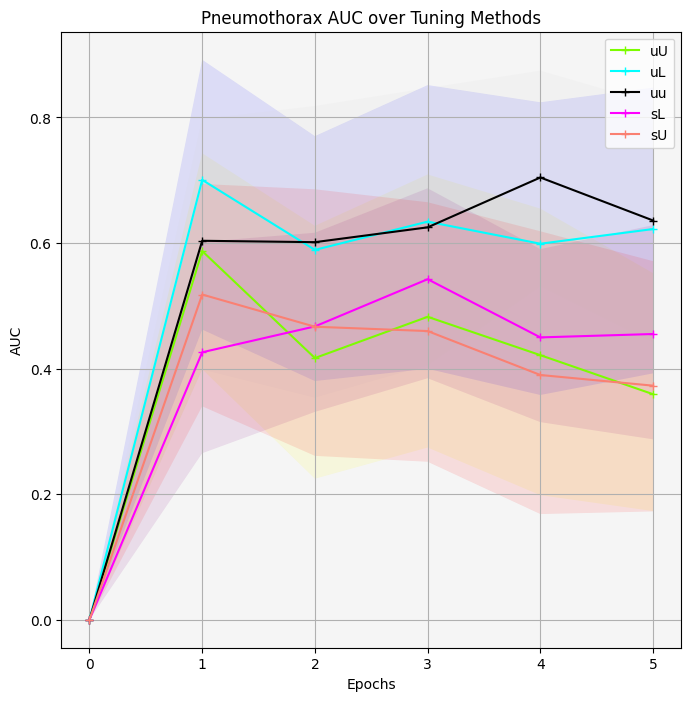

<Figure size 640x480 with 0 Axes>

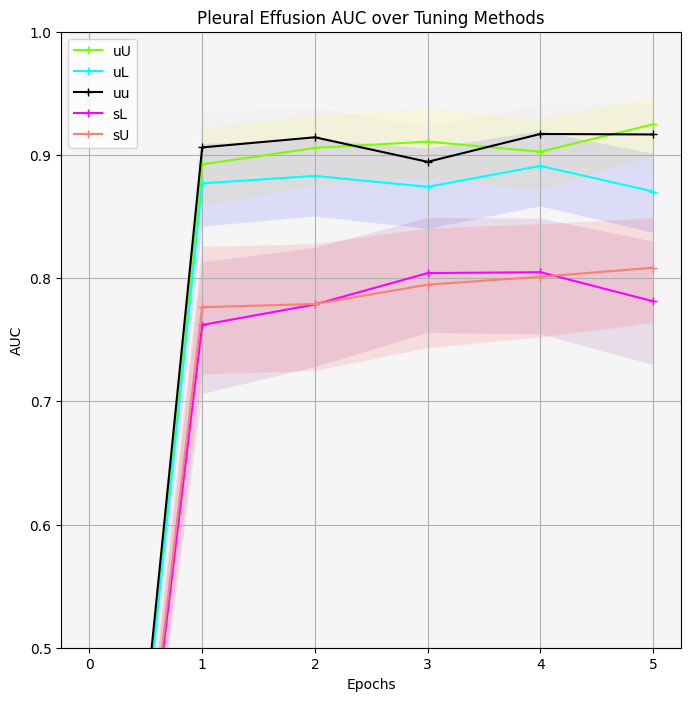

<Figure size 640x480 with 0 Axes>

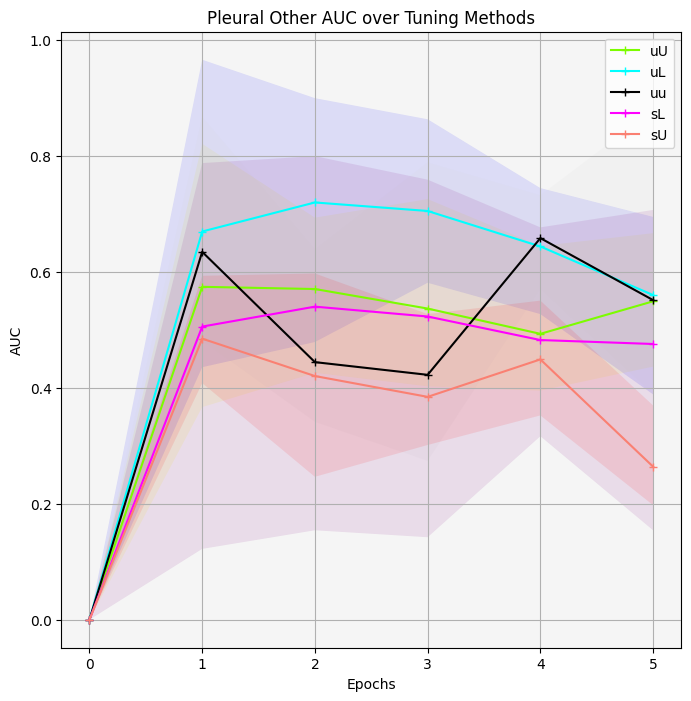

<Figure size 640x480 with 0 Axes>

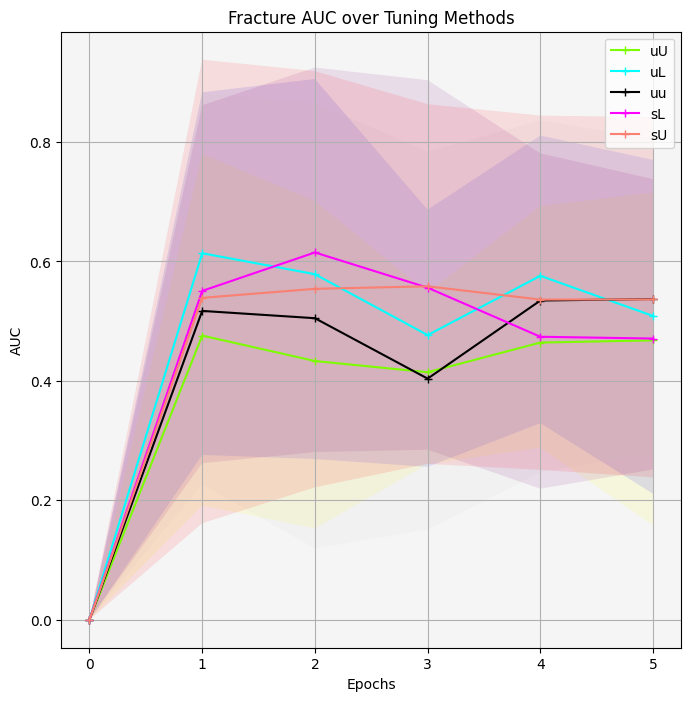

<Figure size 640x480 with 0 Axes>

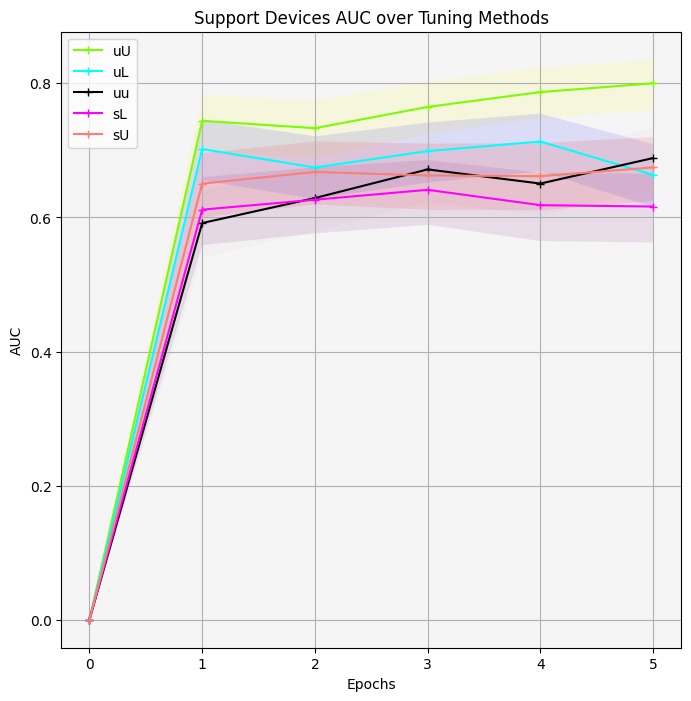

<Figure size 640x480 with 0 Axes>

In [72]:
for label in labels:
    plot_performance(label)

In [65]:
uL_diff = total_dataset['uL'][0][labels].subtract(total_dataset['uu'][-1][labels])

In [64]:
uU_diff = total_dataset['uU'][1][labels].subtract(total_dataset['uu'][-1][labels])

In [67]:
print(uU_diff.to_latex())

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &  Enlarged Cardiomediastinum\_auc &  Cardiomegaly\_auc &  Lung Opacity\_auc &  Lung Lesion\_auc &  Edema\_auc &  Consolidation\_auc &  Pneumonia\_auc &  Atelectasis\_auc &  Pneumothorax\_auc &  Pleural Effusion\_auc &  Pleural Other\_auc &  Fracture\_auc &  Support Devices\_auc \\
\midrule
0 &                          0.0351 &           -0.0246 &            0.0187 &          -0.0514 &    -0.0257 &             0.0077 &         0.0671 &          -0.2529 &           -0.2191 &               -0.0109 &             0.0191 &       -0.1038 &               0.0446 \\
1 &                          0.0375 &           -0.0279 &            0.0198 &           0.0183 &    -0.0306 &             0.0046 &         0.0889 &          -0.2638 &           -0.2176 &               -0.0143 &             0.0369 &       -0.1274 &               0.0449 \\
2 &                          0.0302 &           -0.0222 &            0.0155 &          -0.1016 &    -0.0179 &           

In [68]:
print(uL_diff.to_latex())

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &  Enlarged Cardiomediastinum\_auc &  Cardiomegaly\_auc &  Lung Opacity\_auc &  Lung Lesion\_auc &  Edema\_auc &  Consolidation\_auc &  Pneumonia\_auc &  Atelectasis\_auc &  Pneumothorax\_auc &  Pleural Effusion\_auc &  Pleural Other\_auc &  Fracture\_auc &  Support Devices\_auc \\
\midrule
0 &                          0.0022 &           -0.0661 &            0.0009 &           0.1037 &    -0.0720 &            -0.2292 &        -0.0506 &          -0.1137 &            0.0647 &               -0.0397 &             0.1183 &        0.0767 &               0.0135 \\
1 &                          0.0007 &           -0.0729 &           -0.0001 &           0.0680 &    -0.0905 &            -0.2561 &         0.0272 &          -0.1187 &            0.0200 &               -0.0471 &             0.0465 &       -0.0042 &               0.0122 \\
2 &                          0.0008 &           -0.0573 &           -0.0011 &           0.0917 &    -0.0517 &           